# House Prices, Advanced Regression Techniques Kaggle Competition

dataset: Ames Housing dataset (50 features)

Let's import the dataset here:

In [10]:
import pandas as pd
import numpy as np
import os

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# root = 'datasets/kaggle-boston'

root = '/Users/RezaSoleymanifar/Documents/PythonProjects/TRAIN/datasets/kaggle-boston/'
def load_housing_data(root=root):
    csv_path_train = os.path.join(root, 'train.csv')
    csv_path_test = os.path.join(root, 'test.csv')
    data_train, data_test = pd.read_csv(csv_path_train), pd.read_csv(csv_path_test)
    return data_train, data_test

In [11]:
data_train, data_test = load_housing_data()

In [12]:
%matplotlib inline
corr_matrix= data_train.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

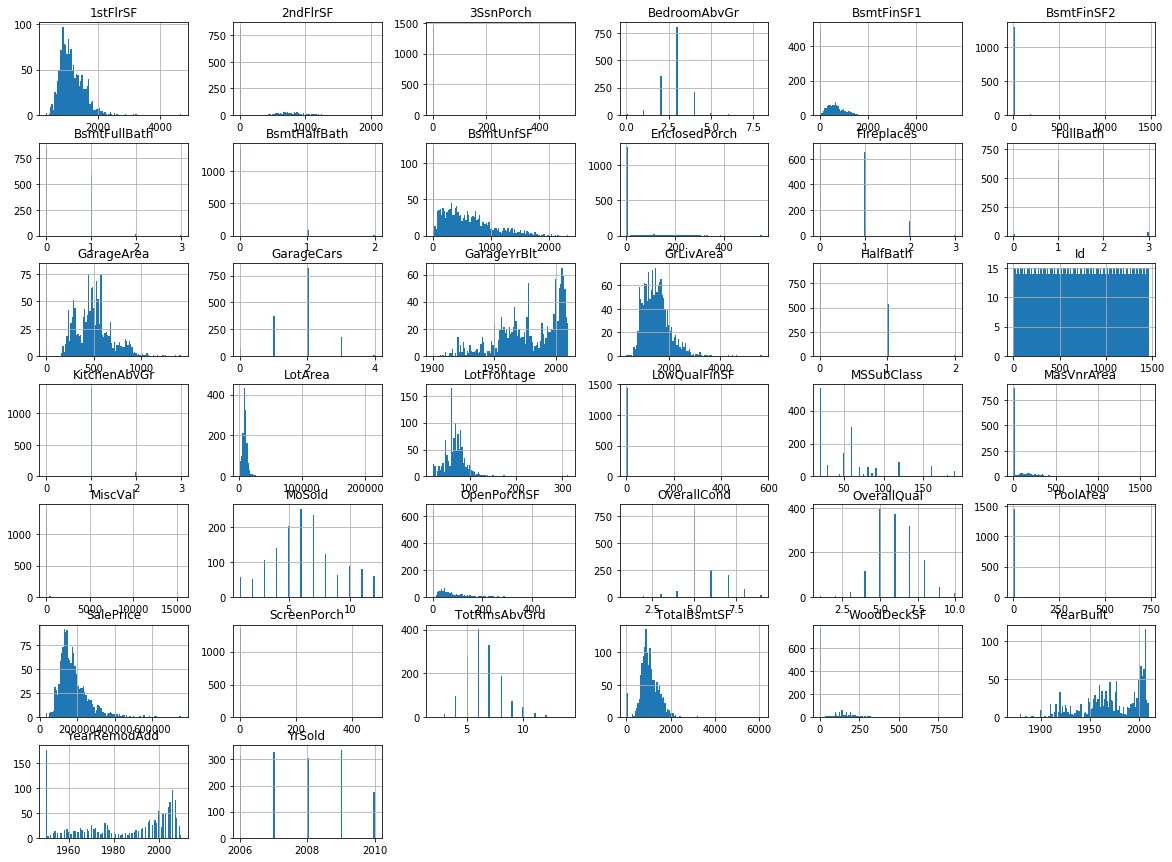

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
data_train.hist(bins=100, figsize=(20,15))
plt.show()

In [15]:
#Dropping labels from train dataset
y_train = data_train['SalePrice'].copy()
data_train.drop('SalePrice', axis = 1, inplace = True)

In [3]:
def display_stats(col_name):
    divider = '\n---------'
    col = data_train[col_name]
    print(""" 
    **********************
    column name: {0}
    ----------------------
    value counts:\n {1}
    ----------------------
    null values:\n {2}
    """.format(col_name, col.value_counts(), col.isna().sum()))

def show_all_stats(data):
    for col in data.columns:
        display_stats(col)

Let's have an in-depth look at the dataset:

In [4]:
show_all_stats(data_train)

 
    **********************
    column name: Id
    ----------------------
    value counts:
 1460    1
479     1
481     1
482     1
483     1
       ..
976     1
977     1
978     1
979     1
1       1
Name: Id, Length: 1460, dtype: int64
    ----------------------
    null values:
 0
    
 
    **********************
    column name: MSSubClass
    ----------------------
    value counts:
 20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
    ----------------------
    null values:
 0
    
 
    **********************
    column name: MSZoning
    ----------------------
    value counts:
 RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
    ----------------------
    null values:
 0
    
 
    **********************
    column name: LotFrontage
    ----------------------
    valu

    
 
    **********************
    column name: GarageCond
    ----------------------
    value counts:
 TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64
    ----------------------
    null values:
 81
    
 
    **********************
    column name: PavedDrive
    ----------------------
    value counts:
 Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64
    ----------------------
    null values:
 0
    
 
    **********************
    column name: WoodDeckSF
    ----------------------
    value counts:
 0      761
192     38
100     36
144     33
120     31
      ... 
269      1
265      1
263      1
260      1
215      1
Name: WoodDeckSF, Length: 274, dtype: int64
    ----------------------
    null values:
 0
    
 
    **********************
    column name: OpenPorchSF
    ----------------------
    value counts:
 0      656
36      29
48      22
20      21
40      19
      ... 
159      1
156      1
148      1
142      1
119

In [5]:
# --------------------------------------------------
# #**DROP COL**: Street (6 outliers), Alley (1369 nulls), Utilities (1 outlier), Condition2 (15 outliers),
# #RoofMatl (26 outliers), Heating (32 outliers), PoolArea (7 outliers),PoolQC (1453 nulls), 
# #MiscFeature (1406 nulls), 
# --------------------------------------------------
# #DROP ROW: MasVnrType, Electrical, GarageYrBlt, GarageFinish,  GarageQual, GarageCond
# --------------------------------------------------
# #**FILLNA**: GarageType, GarageFinish, BsmtQual, BsmtExposure, BsmtCond, BsmtFinType1, BsmtFinType2,
# #Fence, FireplaceQu, GarageType, 
# --------------------------------------------------
# #**ORDINAL ENCODING**: ExterQual (qual_dict), ExterCond (qual_dict), BsmtQual (qual_dict),
# #BsmtCond (qaul_dict), BsmtExposure (exposure_dict),
# #BsmtFinType1 (basement_finish_dict), BsmtFinType2 (basement_finish_dict), HeatingQC (qual_dict),
# #CentralAir (0 or 1), KitchenQual, Functional (functional_dict), GarageQual (qual_dict),
# #GarageCond (qual_dict), Fence(fence_dict), FireplaceQu (qaul_dict)
# --------------------------------------------------
# #**ALTER**: YearBuilt (to age), YearRemodAdd (to age), GarageYrBlt (to age), YrSold (to age)
# --------------------------------------------------
# #**MERGE COLS**: OverallQual, OverallCond (average)/Exterior1st, Exterior2nd/ExterQual, ExterCond (average)
# #BsmtCond, BsmtCond (avg. after encoding)/ GarageQual and GarageCond (avg. after encoding)
# #OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch (sum)/
# --------------------------------------------------
# #**IMPUTE**: LotFrontage (median 69), MasVnrArea (median 0), 
# --------------------------------------------------
# #**ONEHOT**: MSSubClass, MSZoning, LotShape, LandContour, LotConfig, LandSlope, Neighborhood, Condition1, BldgType
# #HouseStyle, RoofStyle, *[Exterior1st, Exterior2nd], MasVnrType, Foundation, Electrical,
# #GarageType, GarageFinish, PavedDrive, MoSold, SaleType, SaleCondition
# --------------------------------------------------
# #**LABELS**: SalePrice

In [5]:
# !cat datasets/kaggle-boston/data_description.txt

cat: datasets/kaggle-boston/data_description.txt: No such file or directory


In [7]:
pd.set_option('display.max_columns', 60)
pd.set_option('display.max_rows', 60)

You might want to consider dropping the values that have the least correlation (abs value) with sales prices.

In [10]:
list_drop_cols = ['Street', 'Alley', 'Utilities', 'Condition2',
                  'RoofMatl', 'Heating', 'PoolArea','PoolQC','MiscFeature', 'Id']
list_fill_na =  ['GarageType', 'GarageFinish', 'BsmtQual', 'BsmtCond',
                 'BsmtFinType1', 'BsmtFinType2', 'Fence', 'FireplaceQu', 'GarageType', 'BsmtExposure',
                'MasVnrType', 'Electrical', 'GarageYrBlt', 'GarageFinish',  'GarageQual', 'GarageCond']
# list_drop_rows = ['MasVnrType', 'Electrical', 'GarageYrBlt', 'GarageFinish',  'GarageQual', 'GarageCond']
list_ordinal_columns = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
                        'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
                        'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 
                        'GarageQual', 'GarageCond', 'Fence', 'FireplaceQu']
list_change_year = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt','YrSold']

list_cat_cols = ['MSSubClass', 'MSZoning', 'LotShape', 'LandContour',
                'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType',
                'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Electrical',
                'GarageType', 'GarageFinish', 'PavedDrive', 'MoSold',
                 'SaleType', 'SaleCondition', 'CentralAir']
list_num_cols = set(data_train.columns) - set(list_cat_cols)
list_cat_cols, list_num_cols = list(list_cat_cols), list(list_num_cols)
cols = data_train.columns

In [11]:
# df_most_common_imputed = colors.apply(lambda x: x.fillna(x.value_counts().index[0]))
#df['X1'] = df['X1'].fillna(df['X1'].mean())

Here we cast some categorical values into ordinal codes. This avoids transforming into one hot vectors which take more space and destroy the ordinal relationship between these categories:

In [12]:
qual_dict = {'Ex':5 ,'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 0:0}
qual_dict_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
                  'HeatingQC', 'GarageCond', 'FireplaceQu', 'GarageQual',
                 'KitchenQual']

exposure_dict = {'Gd':4, 'Av':3, 'Mn':2, 'No':1, 0:0}
exposure_dict_cols = ['BsmtExposure']

basement_finish_dict = {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 0:0}
basement_finish_dict_cols = ['BsmtFinType1', 'BsmtFinType2']

functional_dict = {'Typ':7, 'Min1':6, 'Min2':5, 'Mod':4, 'Maj1':3, 'Maj2':2, 'Sev':1, 'Sal':0}
functional_dict_cols = ['Functional']

fence_dict = {'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, 0:0 }
fence_dict_cols= ['Fence']


ordinal_mapping_list = [[qual_dict_cols, qual_dict], [exposure_dict_cols, exposure_dict],
                 [basement_finish_dict_cols, basement_finish_dict], [functional_dict_cols, functional_dict],
                  [fence_dict_cols, fence_dict]]

Here we define the preprocessing pipeline:

# Preprocessing

In [13]:
import pdpipe as pdp
import math
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def fillna_0(x):
    return 0 if pd.isnull(x) else x
def is_null(x):
    return pd.isnull(x)
def to_age(x):
    return 2020 - x

#drop unwanted columns here
pipeline = pdp.ColDrop(list_drop_cols)
#fill nan values
pipeline += pdp.ApplyByCols(columns = list_fill_na, func = fillna_0)
#apply ordinal condings here

for coldict in ordinal_mapping_list:
    pipeline += pdp.MapColVals(coldict[0], coldict[1])
#apply one hot encoding here
pipeline += pdp.OneHotEncode(list_cat_cols)
#transform dates to ages:
pipeline += pdp.ApplyByCols(list_change_year, to_age)
# impute missing numeric values and standardization
pipeline = Pipeline([
           ("pipe", pipeline),
           ("impute", SimpleImputer(strategy = 'median')),
           ('std_scaler', StandardScaler())
            ])
# ('pca', PCA(n_components = 160))
pipeline_input = pipeline

X_train = pipeline.fit_transform(data_train)

# X_test = pipeline_input.fit_transform(data_test)
# y_test = pipeline_label.transform(data_test)['SalePrice'].copy()

In [14]:
print(X_train.shape, y_train.shape)

(1460, 204) (1460,)


Ok! now we're ready to experiment with some algorithms:

In [15]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

# Random Forest

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

forest_reg = RandomForestRegressor(n_estimators=100, max_features = 50, random_state=42)

In [17]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(forest_reg, X_train, y_train,
                         scoring="neg_mean_squared_log_error", cv=5)
forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

Scores: [0.12933458 0.15511518 0.14568898 0.13949021 0.14198261]
Mean: 0.14232231180377367
Standard deviation: 0.008388197500691736


In [637]:
param_grid = [{'max_features':[40, 50, 60]}]

# 'bootstrap':[True, False], 'ccp_alpha':[0.0, 0.5],

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_log_error', return_train_score=True, n_jobs=-1)

In [635]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [639]:
grid_search.best_params_

In [442]:
def display_res(cvres):
    for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
        print(np.sqrt(-mean_score), params)
    print('best:', np.sqrt(-cvres['mean_test_score']).min())

In [629]:
cvres = grid_search.cv_results_
display_res(cvres)

0.13871729628882248 {'n_estimators': 100}
0.13894420609670532 {'n_estimators': 200}
0.1391087282879602 {'n_estimators': 300}
0.13892702328258136 {'n_estimators': 400}
best: 0.13871729628882248


In [355]:
# result = pd.DataFrame({'real': y_train, 'random_forest': best_forest_reg.predict(X_train)})
# result

In [356]:
# from sklearn.metrics import mean_squared_error

# y_pred = forest_reg.predict(R_test)
# forest_mse = mean_squared_error(u_test, y_pred)
# forest_rmse = np.sqrt(forest_mse)
# forest_rmse

# MLP

Let's train a multilayer perceptron

In [14]:
from sklearn.neural_network import MLPRegressor

mlp_reg = MLPRegressor(hidden_layer_sizes= (200,), alpha= 0.01,
                       solver = 'lbfgs', max_iter = 200, early_stopping = True)

In [516]:
scores = cross_val_score(mlp_reg, X_train, y_train,
                         scoring="neg_mean_squared_log_error", cv=10)
mlp_rmse_scores = np.sqrt(-scores)
display_scores(mlp_rmse_scores)

Scores: [0.15846955 0.1584831  0.19400091 0.19190455 0.18546726 0.16226672
 0.14989675 0.17085231 0.21226427 0.17508782]
Mean: 0.17586932312079057
Standard deviation: 0.018689609304780044


In [457]:
param_grid = [{'hidden_layer_sizes':[(200,),(100, 100), (100,)]}]

grid_search = GridSearchCV(mlp_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_log_error', return_train_score=True, n_jobs=-1)

In [458]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=MLPRegressor(activation='relu', alpha=0.01,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=True, epsilon=1e-08,
                                    hidden_layer_sizes=(200,),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_fun=15000,
                                    max_iter=200, momentum=0.9,
                                    n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t=0.5,
                                    random_state=None, shuffle=True,
                                    solver='lbfgs', tol=0.0001,
                                    validation_fraction=0.1, verbose=False,
                                    warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'hidden_layer_s

In [459]:
grid_search.best_params_

{'hidden_layer_sizes': (200,)}

In [460]:
cvres = grid_search.cv_results_
display_res(cvres)

0.16951708136421015 {'hidden_layer_sizes': (200,)}
0.17366974787218384 {'hidden_layer_sizes': (100, 100)}
0.17493506472280582 {'hidden_layer_sizes': (100,)}
best: 0.16951708136421015


In [401]:
# from sklearn.metrics import mean_squared_error

# y_pred = mlp_reg.predict(R_test)
# mlp_mse = mean_squared_error(u_test, y_pred)
# mlp_rmse = np.sqrt(mlp_mse)
# mlp_rmse

In [99]:
# result = pd.DataFrame({'real': u_test, 'prediction': mlp_reg.predict(R_test)})
# result[:50]

# Gradient Tree Boosting

In [19]:
 from sklearn.ensemble import GradientBoostingRegressor
    
grad_boost_reg = GradientBoostingRegressor(loss = 'ls', subsample = 0.8,
                                           max_features = 100,
                                           random_state= 42)

In [42]:
scores = cross_val_score(grad_boost_reg, X_train, y_train,
                         scoring="neg_mean_squared_log_error", cv=5)
grad_rmse_scores = np.sqrt(-scores)
display_scores(grad_rmse_scores)

Scores: [0.11822718 0.15227237 0.1392601  0.12234294 0.13353089]
Mean: 0.1331266962751974
Standard deviation: 0.01218707400366172


In [501]:
param_grid = [{'max_features': [50, 100, 150]}]

grid_search = GridSearchCV(grad_boost_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_log_error', return_train_score=True, n_jobs=-1)

In [502]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                 

In [506]:
grid_search.best_params_

{'max_features': 100}

In [507]:
cvres = grid_search.cv_results_
display_res(cvres)

0.12671053966499174 {'max_features': 50}
0.12373608020689622 {'max_features': 100}
0.12521558727516852 {'max_features': 150}
best: 0.12373608020689622


In [517]:
# from sklearn.metrics import mean_squared_error

# y_pred = grad_boost_reg.predict(R_test)
# grad_mse = mean_squared_error(u_test, y_pred)
# grad_rmse = np.sqrt(grad_mse)
# grad_rmse

In [130]:
# result = pd.DataFrame({'real': u_test,
#                        'grad_boost': grad_boost_reg.predict(R_test),
#                        'forest_reg': forest_reg.predict(R_test)})
# result[:50]

# Extra Trees

In [21]:
from sklearn.ensemble import ExtraTreesRegressor
    
extra_trees_reg = ExtraTreesRegressor(random_state = 42, bootstrap = False,
                                     max_features = 80, n_estimators = 100)

In [569]:
scores = cross_val_score(extra_trees_reg, X_train, y_train,
                         scoring="neg_mean_squared_log_error", cv=10)
extra_rmse_scores = np.sqrt(-scores)
display_scores(extra_rmse_scores)

Scores: [0.13391116 0.11132908 0.13415728 0.16260474 0.15068944 0.10866148
 0.13243258 0.11963481 0.13131705 0.13296382]
Mean: 0.13177014360723918
Standard deviation: 0.015556918920143013


In [562]:
param_grid = [{'n_estimators':[80, 100, 120]}]

grid_search = GridSearchCV(extra_trees_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_log_error', return_train_score=True, n_jobs=-1)

In [563]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                           criterion='mse', max_depth=None,
                                           max_features=80, max_leaf_nodes=None,
                                           max_samples=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                                           min_samples_leaf=1,
                                           min_samples_split=2,
                                           min_weight_fraction_leaf=0.0,
                                           n_estimators=100, n_jobs=None,
                                           oob_score=False, random_state=42,
                                           verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'n_estimators': [80, 100, 120]}],
       

In [564]:
grid_search.best_params_

{'n_estimators': 100}

In [565]:
cvres = grid_search.cv_results_
display_res(cvres)

0.132929076094859 {'n_estimators': 80}
0.13264600132415105 {'n_estimators': 100}
0.13286305909155904 {'n_estimators': 120}
best: 0.13264600132415105


In [518]:
# from sklearn.metrics import mean_squared_error

# y_pred = extra_trees_reg.predict(R_test)
# extra_mse = mean_squared_error(u_test, y_pred)
# extra_rmse = np.sqrt(extra_mse)
# extra_rmse

In [136]:
# result = pd.DataFrame({'real': u_test, 'extra_trees': extra_trees_reg.predict(R_test)})
# result[50:100]

# AdaBoost

In [22]:
from sklearn.ensemble import AdaBoostRegressor
    
ada_reg = AdaBoostRegressor(n_estimators=200, random_state= 42)

In [603]:
scores = cross_val_score(ada_reg, X_train, y_train,
                         scoring="neg_mean_squared_log_error", cv=5)
ada_rmse_scores = np.sqrt(-scores)
display_scores(ada_rmse_scores)

Scores: [0.1748179  0.20418585 0.19170827 0.21275291 0.18407198]
Mean: 0.19350738230379927
Standard deviation: 0.0136086779561317


In [577]:
param_grid = [{'n_estimators':[100, 150, 200]}]

grid_search = GridSearchCV(ada_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_log_error', return_train_score=True, n_jobs=-1)

In [578]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0,
                                         loss='linear', n_estimators=200,
                                         random_state=42),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'n_estimators': [100, 150, 200]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_log_error', verbose=0)

In [580]:
grid_search.best_params_

{'n_estimators': 100}

In [579]:
cvres = grid_search.cv_results_
display_res(cvres)

0.19025618402285144 {'n_estimators': 100}
0.19308854777923257 {'n_estimators': 150}
0.1939853167685184 {'n_estimators': 200}
best: 0.19025618402285144


In [573]:
# from sklearn.metrics import mean_squared_error

# y_pred = ada_reg.predict(R_test)
# ada_mse = mean_squared_error(u_test, y_pred)
# ada_rmse = np.sqrt(ada_mse)
# ada_rmse

In [37]:
# result = pd.DataFrame({'real': y_train, 'prediction': ada_reg.predict(X_train)})
# result[:50]

# SVR

In [23]:
from sklearn.svm import SVR
    
svr_reg = SVR(kernel= 'linear')

In [616]:
scores = cross_val_score(svr_reg, R_train, u_train,
                         scoring="neg_mean_squared_error", cv=10)
svr_rmse_scores = np.sqrt(-scores)
display_scores(svr_rmse_scores)

Scores: [ 54943.25331179 114943.19975474  77511.18790708  76380.52651506
  68725.43663352  84633.66923918  58670.11834652  71458.04096457
  82511.72614474  94053.79597271]
Mean: 78383.09547899135
Standard deviation: 16499.552327392386


In [615]:
param_grid = [{'kernel':['rbf', 'poly', 'sigmoid']}]

grid_search = GridSearchCV(svr_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_log_error', return_train_score=True, n_jobs=-1)

In [617]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='sigmoid',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'kernel': ['rbf', 'poly', 'sigmoid']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_log_error', verbose=0)

In [618]:
grid_search.best_params_

{'kernel': 'sigmoid'}

In [619]:
cvres = grid_search.cv_results_
display_res(cvres)

0.3812299337123648 {'kernel': 'rbf'}
0.38133478003688936 {'kernel': 'poly'}
0.38102674129592085 {'kernel': 'sigmoid'}
best: 0.38102674129592085


In [48]:
# result = pd.DataFrame({'real': y_train, 'prediction': svr_reg.predict(X_train)})
# result[:50]

In [606]:
# from sklearn.metrics import mean_squared_error

# y_pred = svr_reg.predict(R_test)
# svr_mse = mean_squared_error(u_test, y_pred)
# svr_rmse = np.sqrt(svr_mse)
# svr_rmse

# Linear

In [24]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

In [622]:
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [150]:
scores = cross_val_score(lin_reg, X_train, y_train,
                         scoring="neg_mean_squared_log_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)
display_scores(lin_rmse_scores)

Scores: [5.91890705e+04 2.25276214e+11 7.88765526e+09 4.26588924e+04
 2.75359042e+04 3.18688036e+04 2.31796228e+11 2.23616073e+15
 3.25762178e+17 3.32887628e+04]
Mean: 3.279988041827724e+16
Standard deviation: 9.765637500781464e+16


In [158]:
# from sklearn.metrics import mean_squared_error

# y_pred = lin_reg.predict(X_train)
# lin_mse = mean_squared_error(y_train, y_pred)
# lin_rmse = np.sqrt(lin_mse)
# lin_rmse

27840.804388483954

In [180]:
# result = pd.DataFrame({'real': u_test,
#                        'extra': extra_trees_reg.predict(R_test),
#                        'linear': lin_reg.predict(R_test),
#                        })
# result[:50]

# Stacking

Let's stack some promising regressors together:

In [26]:
from sklearn.ensemble import StackingRegressor

estimators = [
    ('forest', forest_reg),
    ('extra', extra_trees_reg),
    ('grad_boost', grad_boost_reg),
    ('mlp', mlp_reg),
]

stack_reg = StackingRegressor(
    estimators = estimators,
    final_estimator = lin_reg)
# RandomForestRegressor(n_estimators=10, random_state=42)

pipeline_full = Pipeline([
                ('input', pipeline_input),
                ('reg', stack_reg)
                ])

In [27]:
pipeline_full.fit(data_train, y_train)

In [30]:
scores = cross_val_score(stack_reg, X_train, y_train,
                         scoring="neg_mean_squared_log_error", cv=5)
stack_rmse_scores = np.sqrt(-scores)
display_scores(stack_rmse_scores)

Scores: [0.11539236 0.14909517 0.13077614 0.11769475 0.13627109]
Mean: 0.129845901828565
Standard deviation: 0.012403532052781276


In [28]:
scores = cross_val_score(pipeline_full, data_train, y_train,
                         scoring="neg_mean_squared_log_error", cv=5)
stack_rmse_scores = np.sqrt(-scores)
display_scores(stack_rmse_scores)

Scores: [0.11005218 0.14827115 0.13044453 0.12293019 0.13534447]
Mean: 0.12940850550306968
Standard deviation: 0.012718051202018316


In [32]:
from sklearn.externals import joblib
joblib.dump(pipeline_full, "pipeline_full.pkl") 
# full_pipeline = joblib.load("pipeline_full.pkl")

['pipeline_full.pkl']

In [34]:
# result = pd.DataFrame({'real': y_train, 'prediction': pipeline_full.predict(data_train)})
# result[:50]

In [38]:
y_pred = pipeline_full.predict(data_test)

In [40]:
y_pred = pd.DataFrame({'Id': data_test['Id'], 'SalePrice': y_pred})

In [41]:
y_pred

,Id,SalePrice
0,1461,118126.382120
1,1462,156355.173790
2,1463,182872.244635
3,1464,187063.922627
4,1465,196855.872305
...,...,...
1454,2915,82870.578678
1455,2916,83133.017257
1456,2917,158833.384770
1457,2918,113658.185682


In [49]:
import os
cwd = os.getcwd()
csv_path = os.path.join(cwd, 'kaggle-submission.csv')

In [50]:
y_pred.to_csv(path_or_buf=csv_path, index=False)